In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

In [2]:
forwards = load_forwards_df()
forwards.info()
forwards.head(20)

/Users/adrianscholl/LRZ Sync+Share/Projects/price-forward-curve/utils.py:35: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  forwards['TimeStamp'] = pd.to_datetime(forwards['TimeStamp'], errors='coerce')
/Users/adrianscholl/LRZ Sync+Share/Projects/price-forward-curve/utils.py:37: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  forwards['Begin'] = pd.to_datetime(forwards['Begin'], errors='coerce')
/Users/adrianscholl/LRZ Sync+Share/Projects/price-fo

<class 'pandas.core.frame.DataFrame'>
Index: 41541 entries, 0 to 8916
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Identifier  41541 non-null  object        
 1   TimeStamp   41541 non-null  datetime64[ns]
 2   Begin       41541 non-null  datetime64[ns]
 3   End         41541 non-null  datetime64[ns]
 4   Open        20589 non-null  float64       
 5   High        20589 non-null  float64       
 6   Low         20589 non-null  float64       
 7   Close       20569 non-null  float64       
 8   Settlement  41541 non-null  float64       
dtypes: datetime64[ns](3), float64(5), object(1)
memory usage: 3.2+ MB


,Identifier,TimeStamp,Begin,End,Open,High,Low,Close,Settlement
0,D,2021-01-04,2021-01-01,2021-01-02,NaN,NaN,NaN,NaN,48.40
1,D,2021-01-04,2021-01-02,2021-01-03,NaN,NaN,NaN,NaN,50.56
2,D,2021-01-04,2021-01-03,2021-01-04,NaN,NaN,NaN,NaN,38.62
3,D,2021-01-04,2021-01-04,2021-01-05,NaN,NaN,NaN,NaN,48.02
4,D,2021-01-04,2021-01-05,2021-01-06,54.50,54.50,53.5,54.00,55.34
5,D,2021-01-04,2021-01-06,2021-01-07,58.00,58.00,54.0,54.00,56.03
6,D,2021-01-04,2021-01-07,2021-01-08,69.25,69.25,68.0,68.00,69.25
7,D,2021-01-04,2021-01-08,2021-01-09,69.50,69.50,69.5,69.50,71.38
8,D,2021-01-04,2021-01-09,2021-01-10,NaN,NaN,NaN,NaN,55.31
9,D,2021-01-04,2021-01-10,2021-01-11,NaN,NaN,NaN,NaN,48.59


In [3]:
# Count all contracts (rows) in forwards grouped by the timestamp and identifier
contract_counts = forwards.groupby(['TimeStamp', 'Identifier']).size()
contract_counts = contract_counts.reset_index()
contract_counts

,TimeStamp,Identifier,0
0,2021-01-04,D,10
1,2021-01-04,M,10
2,2021-01-04,Q,8
3,2021-01-04,W,6
4,2021-01-04,WE,2
...,...,...,...
5604,2024-10-14,M,10
5605,2024-10-14,Q,10
5606,2024-10-14,W,6
5607,2024-10-14,WE,3


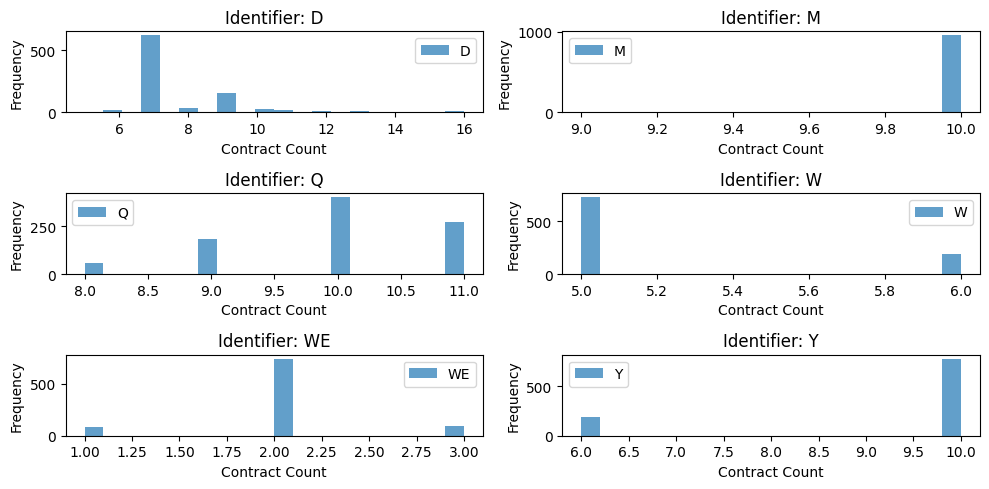

In [4]:
# Plot the distribution of the contract counts as histogram for each identifier in a grid plot with 2 columns
identifiers = contract_counts['Identifier'].unique()
num_identifiers = len(identifiers)

fig, axes = plt.subplots(nrows=(num_identifiers + 1) // 2, ncols=2, figsize=(10, 5))
axes = axes.flatten()

for i, identifier in enumerate(identifiers):
    ax = axes[i]
    data = contract_counts[contract_counts['Identifier'] == identifier]
    ax.hist(data[0], bins=20, alpha=0.7, label=identifier)
    ax.set_title(f'Identifier: {identifier}')
    ax.set_xlabel('Contract Count')
    ax.set_ylabel('Frequency')
    ax.legend()

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

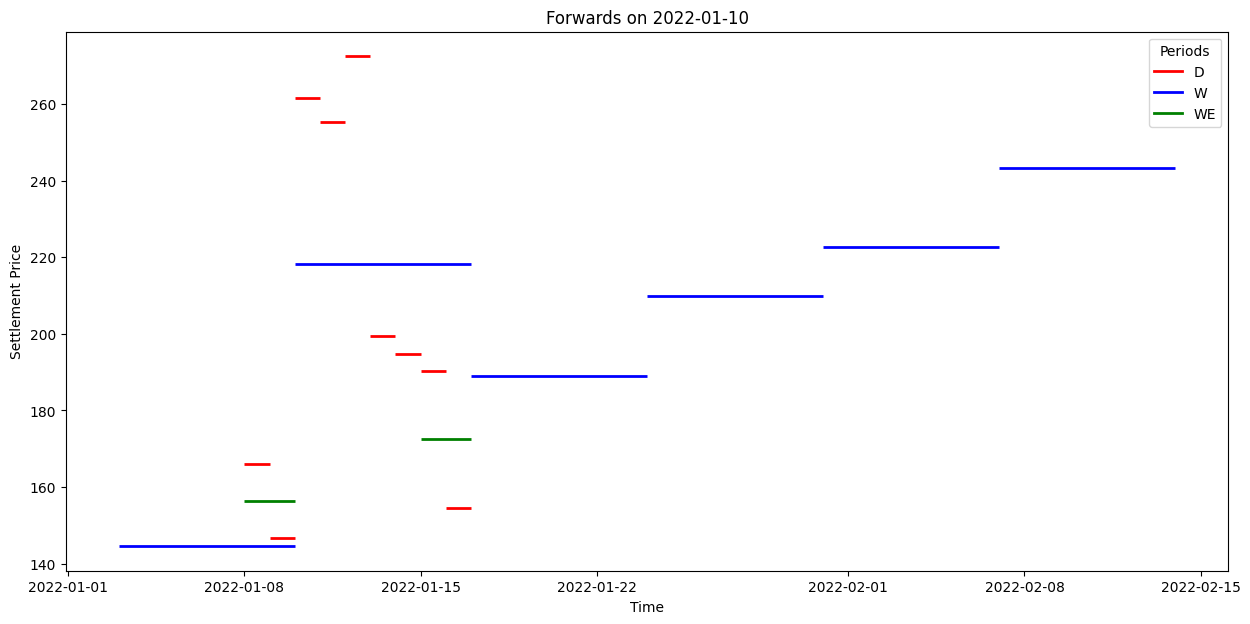

In [5]:
fig = plot_forwards(forwards, '2022-01-10', periods=['D','W','WE'])

In [6]:
def check_arbitrage(date):
    df = forwards[(forwards['TimeStamp'].astype(str).str.contains(date))|(forwards['TimeStamp'].astype(str)==date)].copy()
    # Assuming df is your DataFrame with the specified data
    df['Begin'] = pd.to_datetime(df['Begin'],utc=True)
    df['End'] = pd.to_datetime(df['End'],utc=True)
    df['contract_length_days'] = (df['End'] - df['Begin']).dt.days

    # Define possible contract pairs (short vs long term)
    pairs = [('D','W'),('D','WE'),('W', 'M'), ('M', 'Q'), ('Q', 'Y')]  

    arbitrage_opportunities = []

    # Iterate over each pair of contracts
    for short, long in pairs:
        # Filter contracts by Identifier
        short_contracts = df[df['Identifier'] == short]
        long_contracts = df[df['Identifier'] == long]

        #find combinations of short contracts that combine to a long contract
        for index,long_contract in long_contracts.iterrows():
            begin = long_contract['Begin']
            end = long_contract['End']
            short_date = begin
            combination = []
            while short_date < end:
                short_contract = short_contracts[(short_contracts['Begin'] == short_date)]
                if short_contract.empty:
                    break
                combination.append(short_contract)
                short_date = short_contract['End'].iloc[0]
            if short_date == end:
                mean_short = np.mean([short['Settlement'] for short in combination])
                long_settlement = long_contract['Settlement']
                if abs(long_settlement - mean_short) > 0.01:
                    arbitrage_opportunities.append({
                        'timestamp': date,
                        'long': long,
                        'short': short,
                        'begin': begin,
                        'end': end,
                        'long_settlement': long_settlement,
                        'short_settlement': mean_short,
                        'profit': long_settlement - mean_short
                    })

    # Display arbitrage opportunities
    arbitrage_df = pd.DataFrame(arbitrage_opportunities)
    return arbitrage_df

In [7]:
# # make one big dataframe with arbitrage for every timestamp
# arbitrage_df = pd.DataFrame()
# for date in forwards['TimeStamp'].astype(str).unique():
#     arbitrage_df = pd.concat([arbitrage_df, get_arbitrage_opportunities_in_forwards(forwards, date)])
# arbitrage_df.sort_values(by=['profit'],ascending=False)

## Make PFC arbitrage free while maintaining the original shape as good as possible

In [8]:
def get_forwards(date, periods = ['D', 'W', 'WE', 'M', 'Q', 'Y']):
    data = forwards[((forwards['TimeStamp'].astype(str).str.contains(date))|(forwards['TimeStamp'].astype(str)==date))&(forwards.Identifier.isin(periods))]
    return data.sort_values(by=['Begin'])

In [9]:
test_forecast = pd.read_csv('data/prophet_pfc.csv',sep=',')
test_forecast['timestamp'] = pd.to_datetime(test_forecast['ds'], errors='coerce')
test_forecast['timestamp']

0       2016-01-01 00:00:00
1       2016-01-01 01:00:00
2       2016-01-01 02:00:00
3       2016-01-01 03:00:00
4       2016-01-01 04:00:00
                ...        
44208   2021-12-27 23:00:00
44209   2021-12-28 23:00:00
44210   2021-12-29 23:00:00
44211   2021-12-30 23:00:00
44212   2021-12-31 23:00:00
Name: timestamp, Length: 44213, dtype: datetime64[ns]

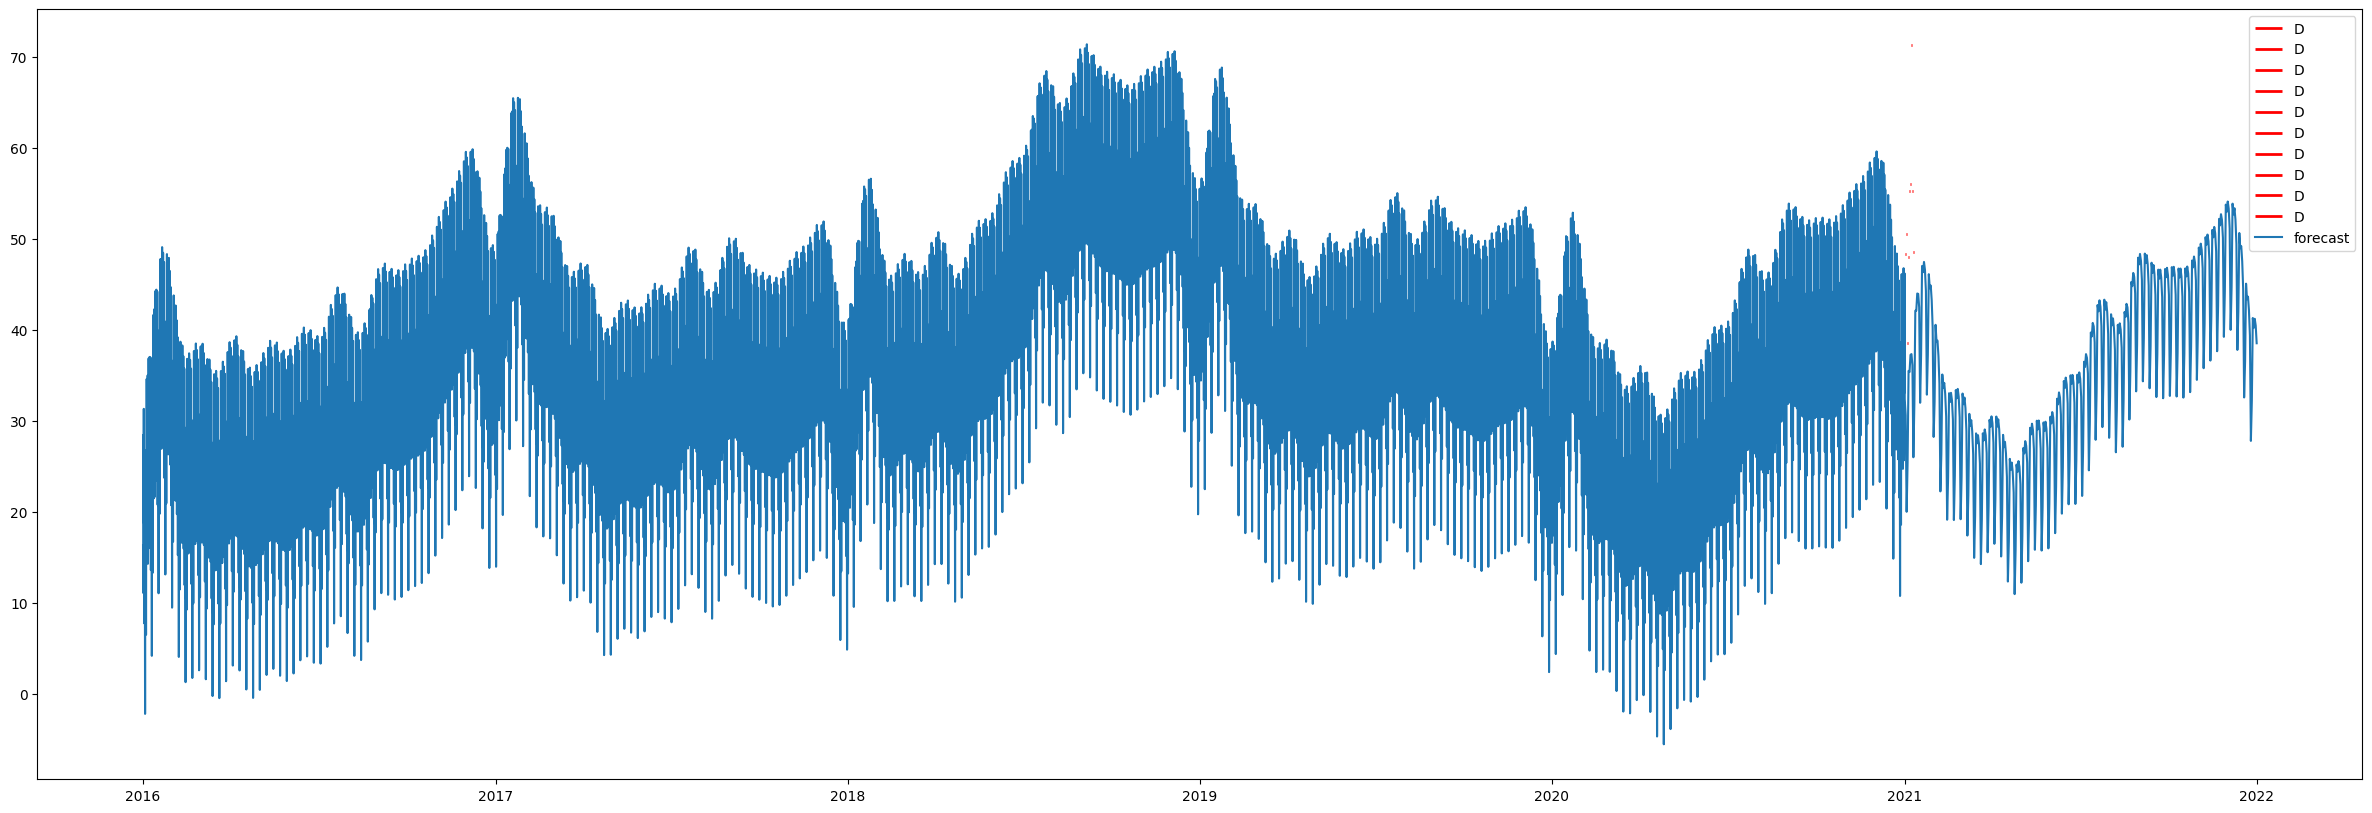

In [10]:
#plot the test forecast together with the forwards in the same period
timestamp = "2021-01-04"
data = get_forwards(timestamp, periods=['D'])
plt.figure(figsize=(30, 10))  # Change the figure size here
for index, row in data.iterrows():
    pass
    plt.hlines(y=row['Settlement'], xmin=row['Begin'], xmax=row['End'], color='red',lw=2,label=row['Identifier'])
plt.plot(test_forecast['timestamp'],test_forecast['yhat'],label='forecast')
plt.legend()
plt.show()

In [11]:
# create linear constraints that guarant arbitrage freeness for an hourly price curve
def get_restrictions(timestamp, start_date, end_date):
    # get daily contracts
    daily = get_forwards(timestamp,periods=['D'])
    first_daily, last_daily = daily['Begin'].min(), daily['End'].max()
    # s_daily = the price of the daily contracts that the 24 hourly prices from the pfc should be equal to
    s_daily = daily['Settlement'].values*24

    d = len(s_daily)
    C_daily = np.zeros((d,24*d))
    for i in range(d):
        C_daily[i,24*i:24*(i+1)] = 1
    #find the hourly index of the start and end date
    return C_daily,s_daily, first_daily, last_daily

In [12]:
forwards = forwards.sort_values(by=['Begin', "Identifier"])

# filter the forwards to only include the contracts that are active during the test forecast
forwards = forwards[(forwards['Begin'] <= test_forecast['timestamp'].min()) & (forwards['End'] >= test_forecast['timestamp'].max())]

# get the first begin date and the latest end date of all forwards
first_forward_date = forwards['Begin'].min()
last_forward_date = forwards['End'].max()

# get the first and last date of the test forecast
first_forecast_hour = test_forecast['timestamp'].min()
# first_forecast_hour = first_forecast_hour.tz.localize(None)
last_forecast_hour = test_forecast['timestamp'].max()
# last_forecast_hour = last_forecast_hour.tz.localize(None)
# calculate the number of hours between the first and last timestamp including both boundaries
hours = (last_forecast_hour - first_forecast_hour).days * 24 + (last_forecast_hour - first_forecast_hour).seconds // 3600

print(first_forecast_hour, last_forecast_hour, hours)

# create a zeros matrix with the number of rows equal to the number of contracts
# and the number of columns equal to the number of forecast hours
A_eq = np.zeros((len(forwards), hours))
for i, row in forwards.iterrows():
    # find the indices of the forecast hours that are within the contract hours
    begin = row['Begin']
    end = row['End']
    print("-----")
    print(row['Identifier'])
    print(begin, first_forecast_hour)
    print((begin - first_forecast_hour).days)
    print("-----")
    begin_index = (begin - first_forecast_hour).days * 24
    end_index = (end - first_forecast_hour).days * 24
    A_eq[i, begin_index:end_index] = 1
# b_eq = total settlement price of the contracts for all contract hours
# --> this sum should be equal to the sum of the forecasted hourly prices
forwards["contract_hours"] = (forwards["End"] - forwards["Begin"]).dt.days * 24
b_eq = forwards['Settlement'].values * forwards['contract_hours'].values

for i in range(0, 10):
    print(forwards.iloc[i, 0], sum(A_eq[i, :])/24, sum(A_eq[i, :]), b_eq[i])

2016-01-01 00:00:00 2021-12-31 23:00:00 52607


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# in every row of the forwards dataframe set the value of the date column to 1 if the date is >= begin hour and <= end hour
for index, row in forwards.iterrows():
    forwards.loc[index, (row['Begin']):(row['End'])] = 1

forwards

In [13]:
count_contracts = len(forwards)
b_eq = np.zeros(count_contracts)


# create the matrix A_eq and the vector b_eq

In [14]:
from scipy.optimize import minimize

lambda_1 = 0
yhat = np.array(test_forecast['yhat'].values)
x0 = yhat

def objective_function(x):
    return np.sum(np.square(x-yhat)) + lambda_1 * np.sum(np.abs(np.diff(x)))

A_eq, b_eq, _, _ = get_restrictions('2021-01-04',pd.Timestamp('2021-01-04'),pd.Timestamp('2021-01-31'))

result = minimize(objective_function, x0, constraints={'type':'eq','fun': lambda x: A_eq@x - b_eq})

if result.success:
    print("Optimal value:", result.fun)
    print("Optimal solution:", result.x)
else:
    print("Optimization failed:", result.message)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 44213 is different from 240)

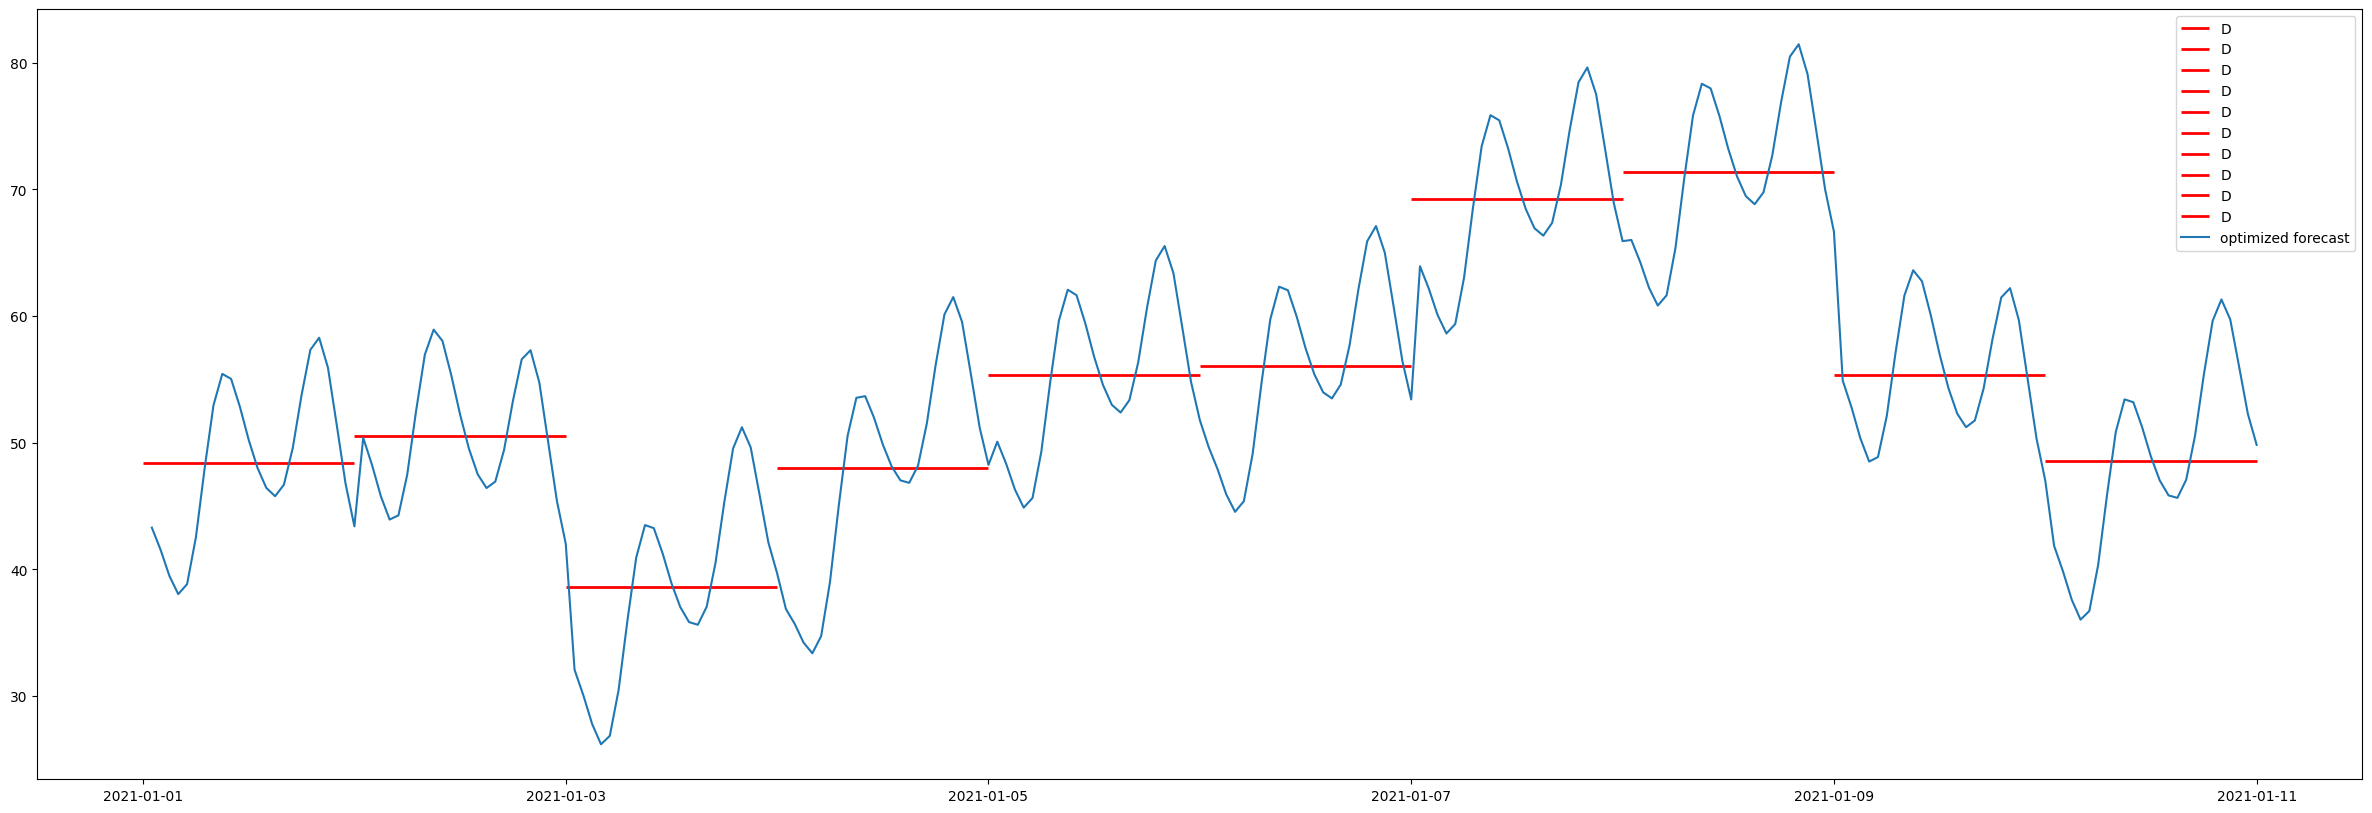

In [13]:
# plot the optimized forecast together with the forwards in the same period
data = get_forwards('2021-01-04',periods=['D'])
plt.figure(figsize=(30, 10))  # Change the figure size here
for index, row in data.iterrows():
    plt.hlines(y=row['Settlement'], xmin=row['Begin'], xmax=row['End'], color='red',lw=2,label=row['Identifier'])
plt.plot(test_forecast['timestamp'], result.x,label='optimized forecast')
plt.legend()
plt.show()